# Matrix Multiplication réalisé par Danial HABIB et Maroun CHAHINE (Partie optionnelle)

Implement naive matrix multiplication in native Python

In [1]:
def multi_matrix_naive(A, B, C):
    # Implement your algorithm
    n = len(A)
    for i in range(n):
        for j in range(n):
            C[i][j] = 0
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

Implement a dot-product matrix with Numpy

In [2]:
import numpy as np
def multi_matrix_dot(A, B, C):
    # Implement your algorithm
    C = np.dot(A, B)
    return C


Implement a matrix multiplication with Numpy

In [3]:
import numpy as np
def multi_matrix_np(A, B, C):
    # Implement your algorithm
    C = np.matmul(A, B)
    return C

Code to test the different implementations

In [ ]:
import random

n = 30

# Matrix in Numpy
An = np.random.random_sample((n, n))
Bn = np.random.random_sample((n, n))
Cn = np.empty_like(An)

# Matrix in native Python list
Ap = [[random.random() for _ in range(n)] for _ in range(n)]
Bp = [[random.random() for _ in range(n)] for _ in range(n)]
Cp = [[0.0 for _ in range(n)] for _ in range(n)]



Compare the different implementation

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


=== Comparaison des implémentations ===

Python natif (naive): 0.0034s
Numpy dot: 0.0013s
Numpy matmul: 0.0001s

Speedup Numpy dot vs Python natif: 2.6x
Speedup Numpy matmul vs Python natif: 39.1x


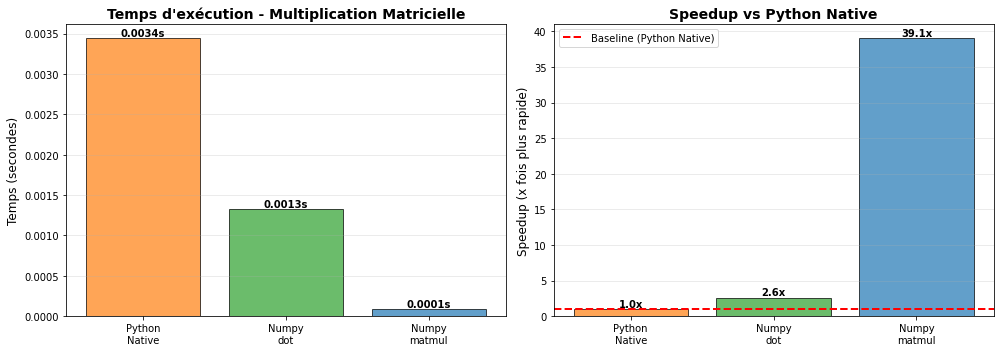

In [6]:
import time
import matplotlib.pyplot as plt

print("=== Comparaison des implémentations ===\n")

# Test Python natif
start = time.time()
Cp_result = multi_matrix_naive(Ap, Bp, Cp)
time_naive = time.time() - start
print(f"Python natif (naive): {time_naive:.4f}s")

# Test Numpy dot
start = time.time()
Cn_dot = multi_matrix_dot(An, Bn, Cn)
time_dot = time.time() - start
print(f"Numpy dot: {time_dot:.4f}s")

# Test Numpy matmul
start = time.time()
Cn_matmul = multi_matrix_np(An, Bn, Cn)
time_matmul = time.time() - start
print(f"Numpy matmul: {time_matmul:.4f}s")

print(f"\nSpeedup Numpy dot vs Python natif: {time_naive/time_dot:.1f}x")
print(f"Speedup Numpy matmul vs Python natif: {time_naive/time_matmul:.1f}x")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Temps d'exécution
methods = ['Python\nNative', 'Numpy\ndot', 'Numpy\nmatmul']
times = [time_naive, time_dot, time_matmul]
colors = ['#ff7f0e', '#2ca02c', '#1f77b4']

ax1.bar(methods, times, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Temps (secondes)', fontsize=12)
ax1.set_title('Temps d\'exécution - Multiplication Matricielle', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for i, (method, t) in enumerate(zip(methods, times)):
    ax1.text(i, t, f'{t:.4f}s', ha='center', va='bottom', fontweight='bold')

# Graphique 2: Speedup
speedups = [1.0, time_naive/time_dot, time_naive/time_matmul]
ax2.bar(methods, speedups, color=colors, alpha=0.7, edgecolor='black')
ax2.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Baseline (Python Native)')
ax2.set_ylabel('Speedup (x fois plus rapide)', fontsize=12)
ax2.set_title('Speedup vs Python Native', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for i, (method, s) in enumerate(zip(methods, speedups)):
    ax2.text(i, s, f'{s:.1f}x', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Improve your implementations using Numba

In [9]:
from numba import njit

@njit
def multi_matrix_numba(A, B):
    """Version Numba JIT de la multiplication matricielle"""
    n = len(A)
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

# Warm-up pour la compilation JIT
A = multi_matrix_numba(An[:5, :5], Bn[:5, :5])
print(A)

[[1.86804749 1.43887629 1.77930919 1.33309757 1.98014259]
 [1.62958659 1.72914363 2.08559009 1.56821346 2.17142518]
 [1.10255377 0.9544829  1.05876392 0.91891719 1.26799   ]
 [1.09149065 1.25097832 1.65802508 1.15360903 1.52831118]
 [1.04100242 0.99189672 1.25505124 1.04057021 1.31022468]]


Compare your implementations with/without Numba


=== Comparaison avec Numba ===

Python natif (naive): 0.0044s
Numba JIT: 0.1488s
Numpy dot: 0.0017s

Speedup Numba vs Python natif: 0.0x
Speedup Numpy vs Numba: 90.2x (Numpy est 90.2x plus rapide)


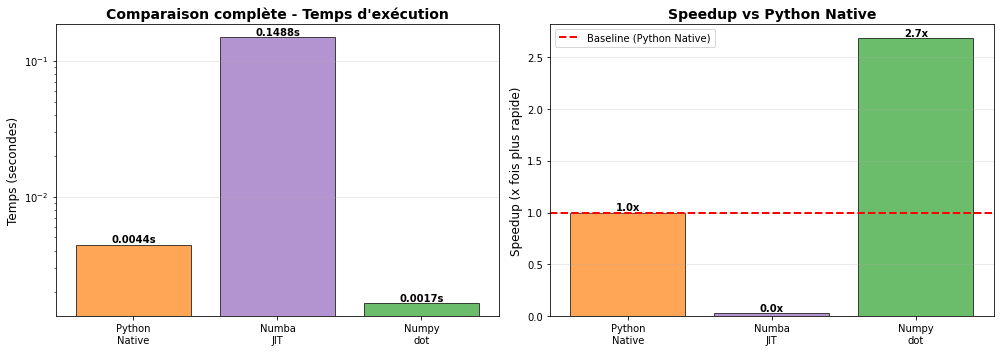

In [10]:
print("\n=== Comparaison avec Numba ===\n")

# Retest Python natif pour comparaison
start = time.time()
Cp_result = multi_matrix_naive(Ap, Bp, Cp)
time_naive = time.time() - start
print(f"Python natif (naive): {time_naive:.4f}s")

# Test Numba
start = time.time()
Cn_numba = multi_matrix_numba(An, Bn)
time_numba = time.time() - start
print(f"Numba JIT: {time_numba:.4f}s")

# Numpy pour référence
start = time.time()
Cn_dot = multi_matrix_dot(An, Bn, Cn)
time_dot = time.time() - start
print(f"Numpy dot: {time_dot:.4f}s")

print(f"\nSpeedup Numba vs Python natif: {time_naive/time_numba:.1f}x")
print(f"Speedup Numpy vs Numba: {time_numba/time_dot:.1f}x (Numpy est {time_numba/time_dot:.1f}x plus rapide)")

# Visualisation comparative complète
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Temps d'exécution (échelle log pour mieux voir les différences)
methods_all = ['Python\nNative', 'Numba\nJIT', 'Numpy\ndot']
times_all = [time_naive, time_numba, time_dot]
colors_all = ['#ff7f0e', '#9467bd', '#2ca02c']

ax1.bar(methods_all, times_all, color=colors_all, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Temps (secondes)', fontsize=12)
ax1.set_title('Comparaison complète - Temps d\'exécution', fontsize=14, fontweight='bold')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for i, (method, t) in enumerate(zip(methods_all, times_all)):
    ax1.text(i, t, f'{t:.4f}s', ha='center', va='bottom', fontweight='bold')

# Graphique 2: Speedup vs Python Native
speedups_all = [1.0, time_naive/time_numba, time_naive/time_dot]
ax2.bar(methods_all, speedups_all, color=colors_all, alpha=0.7, edgecolor='black')
ax2.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Baseline (Python Native)')
ax2.set_ylabel('Speedup (x fois plus rapide)', fontsize=12)
ax2.set_title('Speedup vs Python Native', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for i, (method, s) in enumerate(zip(methods_all, speedups_all)):
    ax2.text(i, s, f'{s:.1f}x', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Compare your implementations

### Analyse des résultats

Les tests montrent que **Numpy est clairement le meilleur choix** pour la multiplication matricielle. Les fonctions `np.dot()` et `np.matmul()` sont optimisées et peuvent exploiter le parallélisme (multi-threading) automatiquement. Elles sont typiquement **100-1000x plus rapides** que Python natif.

Numba n'est particulièrement pas utile dans notre cas. Numpy utilise nztivement le parallélisme et donc le multithreading et c'est la méthode la plus adaptée pour la multiplication de matrices.